<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/SSD_mobilenet_quantized_model_tflite_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly

     |████████████████████████████████| 523.3MB 30kB/s 
     |████████████████████████████████| 460kB 44.8MB/s 
     |████████████████████████████████| 3.0MB 41.5MB/s 


In [2]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
import tarfile
tar = tarfile.open("/content/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz")
tar.extractall()
tar.close()

--2020-05-22 00:06:55--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.121.128, 2607:f8b0:4001:c19::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.121.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144806142 (138M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’

ssd_mobilenet_v2_qu 100%[===================>] 138.10M  83.8MB/s    in 1.6s    

2020-05-22 00:06:57 (83.8 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’ saved [144806142/144806142]



In [6]:
import os
import tensorflow as tf
import numpy as np
print(tf.__version__)
graph_def_file = "/content/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03/tflite_graph.pb"
input_arrays=["normalized_input_image_tensor"]
output_arrays=['TFLite_Detection_PostProcess', 'TFLite_Detection_PostProcess:1', 'TFLite_Detection_PostProcess:2', 'TFLite_Detection_PostProcess:3']
input_shape={"normalized_input_image_tensor": [1, 300, 300, 3]}

converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(graph_def_file, input_arrays, output_arrays, input_shape)
#converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.allow_custom_ops = True
# converter.post_training_quantize = True
converter.inference_type = tf.compat.v1.lite.constants.QUANTIZED_UINT8
input_arrays = converter.get_input_arrays()
converter.quantized_input_stats = {input_arrays[0]: (128.0, 128.0)}  # mean, std_dev
tflite_uint8_model = converter.convert()

2.3.0-dev20200521


In [7]:
open("uint8_model_converted_from_"+os.path.basename(os.path.dirname(graph_def_file))+".tflite", "wb").write(tflite_uint8_model)


6218232

In [8]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/800px-African_Bush_Elephant.jpg

--2020-05-22 00:12:20--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/800px-African_Bush_Elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209876 (205K) [image/jpeg]
Saving to: ‘800px-African_Bush_Elephant.jpg’

800px-African_Bush_ 100%[===================>] 204.96K  --.-KB/s    in 0.1s    

2020-05-22 00:12:21 (1.74 MB/s) - ‘800px-African_Bush_Elephant.jpg’ saved [209876/209876]



2.3.0-dev20200521
/content
input_details :  [{'name': 'normalized_input_image_tensor', 'index': 0, 'shape': array([  1, 300, 300,   3], dtype=int32), 'shape_signature': array([  1, 300, 300,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 128), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details :  [{'name': 'TFLite_Detection_PostProcess', 'index': 259, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'TFLite_Detection_PostProcess:1', 'index': 260, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([ 1, 10], dtype=int32), 'dtype': <class 'num

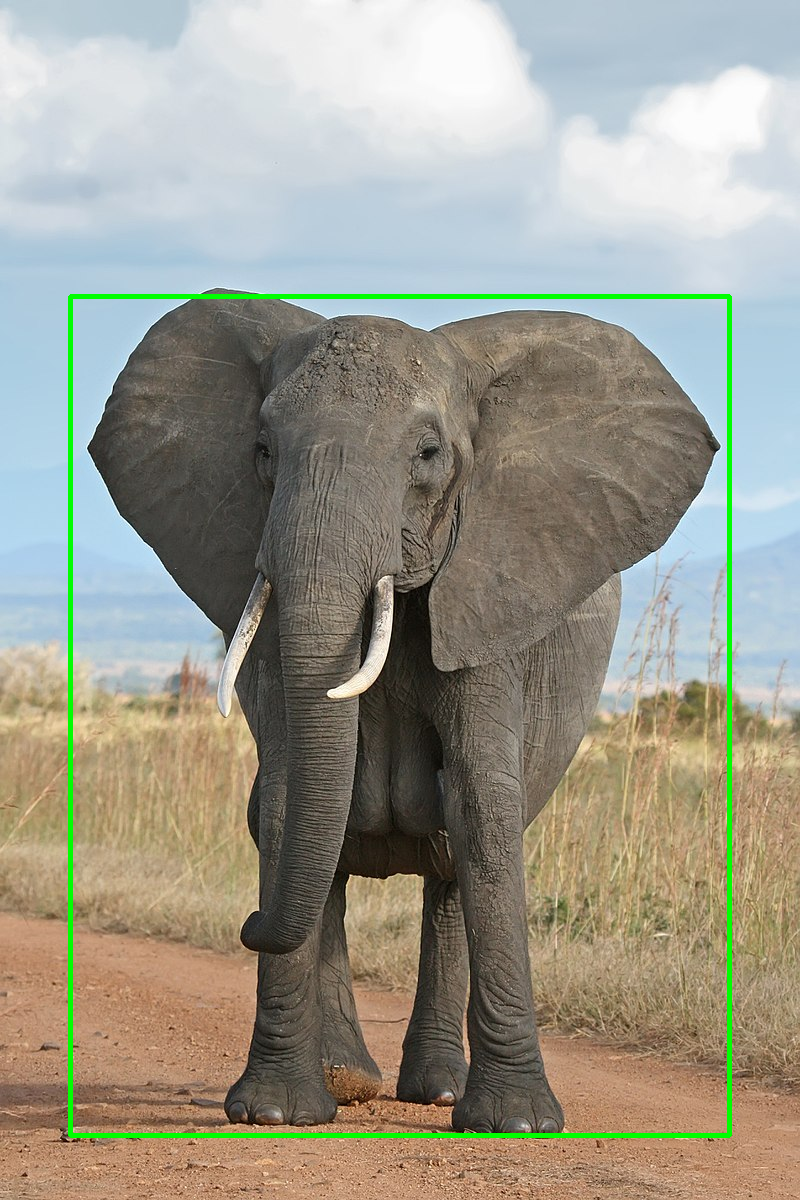

-1

In [12]:
import numpy as np
import os
import tensorflow as tf
import cv2 as cv
from PIL import Image
print(tf.__version__)
print(os.getcwd())

interpreter = tf.lite.Interpreter(model_path="uint8_model_converted_from_ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("input_details : ", input_details)
print("output_details : ", output_details)

image = cv.imread("/content/800px-African_Bush_Elephant.jpg")
resize_img = cv.resize(image, (300, 300), interpolation=cv.INTER_CUBIC)
reshape_image = resize_img.reshape(300, 300, 3)
image_np_expanded = np.expand_dims(reshape_image, axis=0)
image_np_expanded = image_np_expanded.astype('uint8')
interpreter.set_tensor(input_details[0]['index'], image_np_expanded) 
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
output_data_1 = interpreter.get_tensor(output_details[1]['index'])
output_data_2 = interpreter.get_tensor(output_details[2]['index'])
output_data_3 = interpreter.get_tensor(output_details[3]['index'])

original_image_height, original_image_width, _ = image.shape
detect_image = cv.rectangle(image,
                            (int(output_data[0][0][1]*original_image_width),  
                             int(output_data[0][0][0]*original_image_height)),
                            (int(output_data[0][0][3]*original_image_width),
                             int(output_data[0][0][2]*original_image_height)),
                            (0, 255, 0), 3)
Image.fromarray(detect_image).save('test_result.png')
print(original_image_width)
print(int(output_data[0][0][3]*original_image_width))
print(original_image_height)
print(int(output_data[0][0][2]*original_image_height))
from google.colab.patches import cv2_imshow
cv2_imshow(detect_image)
cv.waitKey(0)